When generating data we can assume that the data is normally distributed and therefore the parametres of the ditribution will be the mean (**mu**) and the standard deviation (**sigma**). Subsequently we can CALCULATE the mean (**M**) and the standard deviation (**S**) of the achived data. These parametres must have approximately the same values, as what we defined during generation of the data.

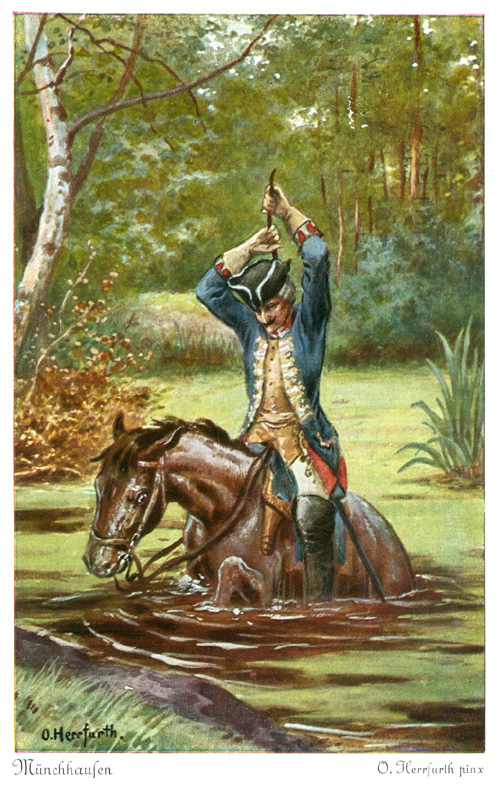

M = 0.955
S = 0.91


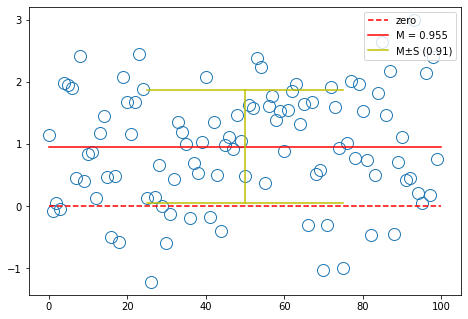

In [ ]:
# cell 2
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np

# We indicate parametres of the normal distibutuition for a new dataset
mu = 1 # planned mean
sigma = 1 # planned standard deviation
n  = 100 # here indicate the sample size

XX = np.random.randn(n) * sigma + mu # generate random data accarding to the indicatd parametres

# estimate mean, sandard deviation and buil de hystogram of the data distribution
M=np.mean(XX) # empiric mean
S=np.std(XX) # empiric standard deviation

print('M = ' + str(round(M, 3)))
print('S = ' + str(round(S, 3)))

fig  = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(XX, 'o', mfc = 'none',  markersize = 12)

L = len(XX);

ax.plot([0, L], [0, 0], 'r--', label = 'zero');
ax.plot([0, L], [M, M], 'r', label = 'M = ' + str(round(M, 3)));

ax.plot( [L*0.25, L*0.75], [M-S, M-S], 'y', label = 'M\u00B1S (' + str(round(S, 3)) + ')' ) # the mean minus standard deviation
ax.plot( [L*0.25, L*0.75], [M+S, M+S], 'y') # the mean plus standard deviation
ax.plot( np.array([1, 1])*L/2, np.array([-1, 1])*S+M, 'y')

ax.legend(loc="upper right");

What is normal distribution? It is a pattern variation of data values which is often observed in the nature. This distribution can be described in parameteres of the mean (mu) and the standard deviation (sigma). 
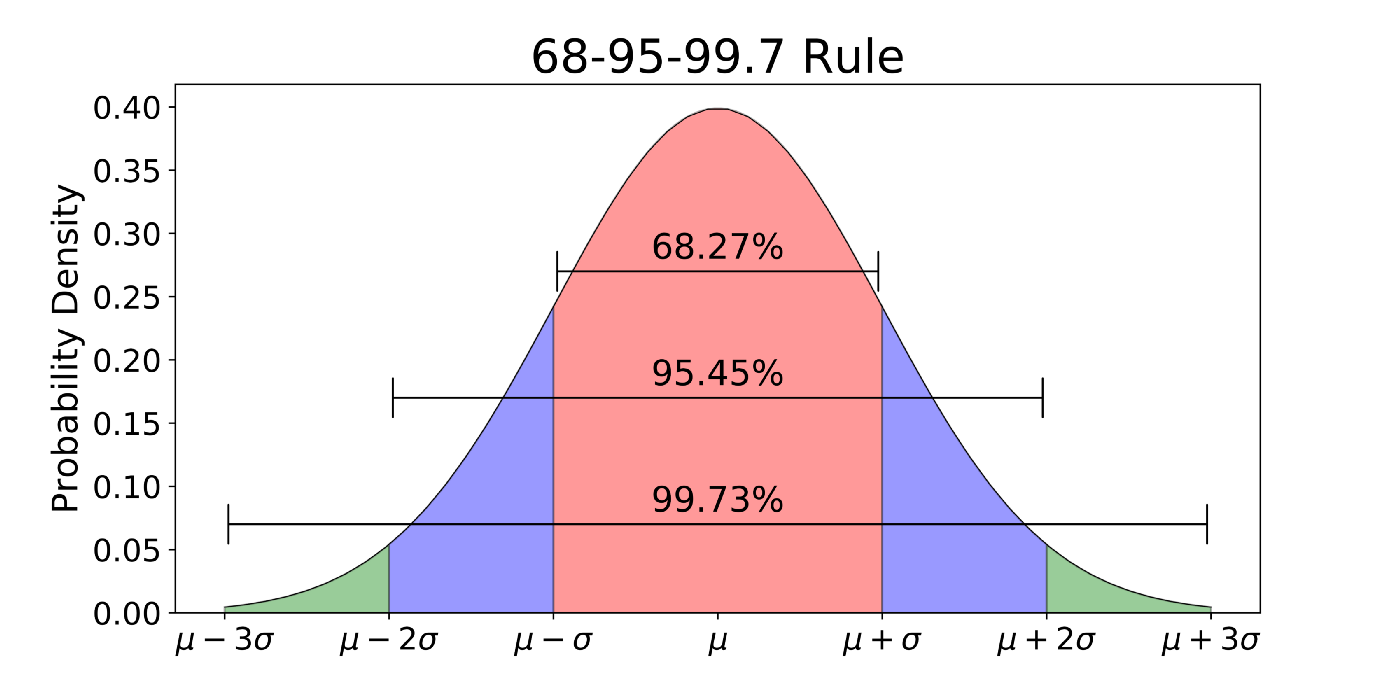

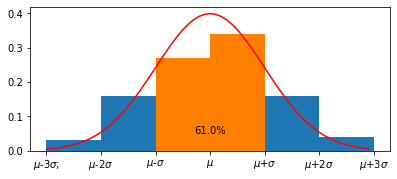

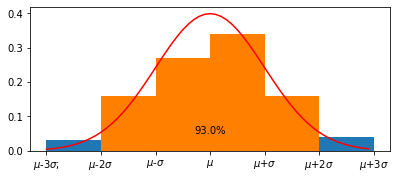

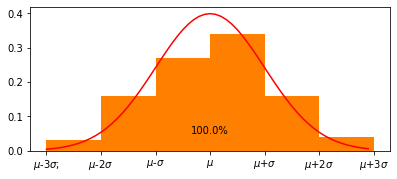

In [ ]:
# cell 3
# plot plobability per sigma-based bins
import matplotlib.pyplot as plt
import numpy as np

mu = 1 # planned mean
sigma = 1 # planned standard deviation
n  = 100 # here indicate the sample size

XX = np.random.randn(n) * sigma + mu # generate data

fig1  = plt.figure(figsize=(5, 2))
ax = fig1.add_axes([0,0,1,1])
bins = np.array([-3, -2, -1, 0, 1, 2, 3])*sigma + mu

n, bins, patches = ax.hist(XX, bins, density=False, weights=np.ones(len(XX)) / len(XX))

# add a 'best fit' line
LS = np.arange(-3, 3, 0.1)*sigma + mu # linespase

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
    np.exp(-0.5 * (1 / sigma * (LS - mu))**2)) # normal function curve

ax.plot( LS, y*sigma, color='r')
plt.xticks(mu + sigma*np.array([-3, -2, -1, 0, 1, 2, 3]), 
           ['$\mu$-3$\sigma$;', '$\mu$-2$\sigma$', '$\mu$-$\sigma$', '$\mu$', '$\mu$+$\sigma$', '$\mu$+2$\sigma$', '$\mu$+3$\sigma$']);

plt.setp(patches[2:4], "facecolor", [1, 0.5, 0])
S1=sum(n[2:4])*100
A1=ax.annotate("{:.1f}%".format(S1), xy=(mu, 0.05), ha='center')

display(fig1)
plt.setp(patches[1:5], "facecolor", [1, 0.5, 0])
S2=sum(n[1:5])*100
A1.set_text("{:.1f}%".format(S2))

display(fig1)
plt.setp(patches[0:6], "facecolor", [1, 0.5, 0])
S3=sum(n)*100
A1.set_text("{:.1f}%".format(S3))

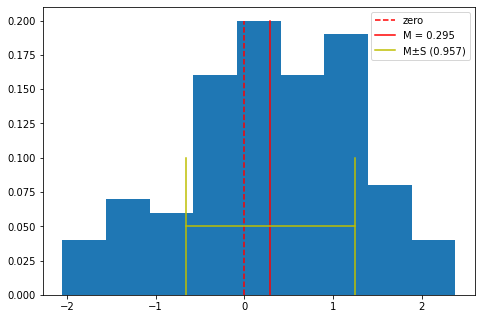

In [ ]:
# cell 4
# histogram representation of mean and standard deviation
import matplotlib.pyplot as plt
import numpy as np

mu = 0.5 # planned mean
sigma = 1 # planned standard deviation
n  = 100 # here indicate the sample size

XX = np.random.randn(n) * sigma + mu # generate data

# estimate mean, sandard deviation and buil de hystogram of the data distribution
M=np.mean(XX) # empiric mean
S=np.std(XX) # empiric standard deviation

fig2  = plt.figure()
ax = fig2.add_axes([0,0,1,1])

nbins = 10;
data = XX;
LS = np.linspace( min(data), max(data), nbins )

nn, bins, patches = ax.hist(data, LS, density=False, weights=np.ones(len(data)) / len(data))

MA = np.max(nn)

ax.plot([0, 0], [0, MA], 'r--',  label = 'zero');
ax.plot([M, M], [0, MA], 'r', label = 'M = ' + str(round(M, 3)));
ax.plot([M-S, M-S], [0, MA*0.5], 'y', label = 'M\u00B1S (' + str(round(S, 3)) + ')'); # the mean minus standard deviation
ax.plot([M+S, M+S], [0, MA*0.5], 'y'); # the mean plus standard deviation
ax.plot([M-S, M+S], np.array([MA, MA])*0.25, 'y');

ax.legend(loc="upper right");

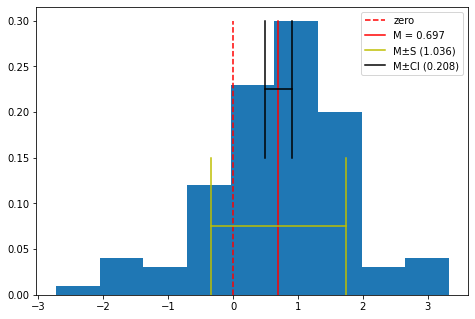

In [ ]:
# cell 5
# 95% confidence interval (CI) unsing analitic "Student" approach
# adavantage: simple to compute

L = len(XX)
EM = S / (L-1)**(1/2) # standard error
CI1 = M - EM * 2
CI2 = M + EM * 2

ax.plot([CI1, CI1], [MA*0.5, MA], color = 'k', label = 'M\u00B1CI (' + str(round(EM*2, 3)) + ')' ) # lower limit of CI
ax.plot([CI2, CI2], [MA*0.5, MA], color = 'k') # upper limit of CI
ax.plot([CI1, CI2], np.array([MA, MA])*0.75, color = 'k')

ax.legend(loc="upper right")

display(fig2)

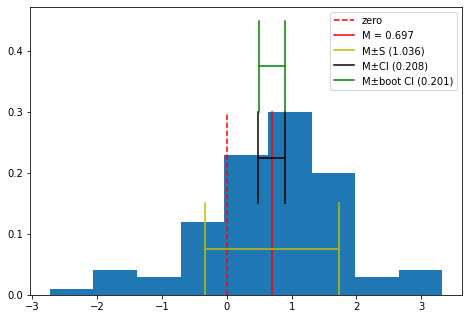

In [ ]:
# cell 6
# 95% confidence interval using empiric "boostrap" approach 
# Advantage: more intuitive

sampled_means = []

for i in range(10000):
  y = np.random.choice( XX , size = L, replace = True)
  avg = np.mean(y)
  sampled_means.append(avg)

sampled_means = np.array(sampled_means)

CI1 = np.percentile(sampled_means, 2.5)
CI2 = np.percentile(sampled_means, 97.5)

ylim = np.array([-1, 1])
ylev = np.array([ 0, 0])
ax.plot([CI1, CI1], [MA, MA*1.5], color = 'g', label = 'M\u00B1boot CI (' + str(round((CI2-CI1)/2, 3)) + ')') # lower limit of confidnece interval
ax.plot([CI2, CI2], [MA, MA*1.5], color = 'g') # upper limit of confidnece interval
ax.plot([CI1, CI2], ylev+MA*1.25, color = 'g')

ax.legend(loc="upper right")

display(fig2)

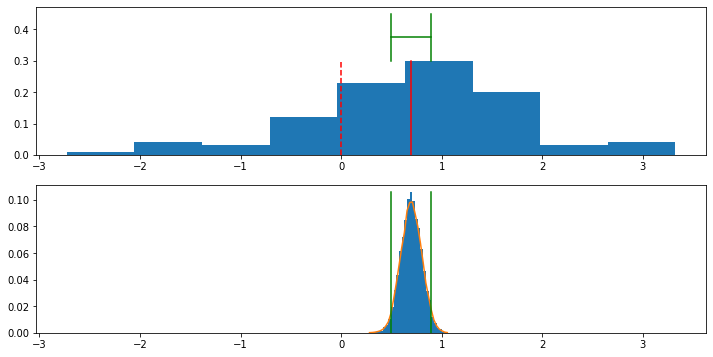

In [ ]:
# cell 7
# illustrate the bootstrap distribution, where the 95% confidense interval (CI) comes
from scipy.stats.kde import gaussian_kde

fig, axs = plt.subplots(nrows=2, figsize=(12, 6))

data = XX
nbins = 10
LS = np.linspace( min(data), max(data), nbins )
n, bins, patches = axs[0].hist(data, LS, density=False, weights=np.ones(len(data)) / len(data))
ylim = np.array([-1, 1])
ylev = np.array([ 0, 0])

axs[0].plot([CI1, CI1], [MA, MA*1.5], color = 'g', 
            label = 'M\u00B1boot CI (' + str(round((CI2-CI1)/2, 3)) + ')') # lower limit of confidnece interval
axs[0].plot([CI2, CI2], [MA, MA*1.5], color = 'g') # upper limit of confidnece interval
axs[0].plot([CI1, CI2], ylev+MA*1.25, color = 'g')

axs[0].plot([M, M], [0, MA], 'r', label = 'M = ' + str(round(M, 3)));
axs[0].plot([0, 0], [0, MA], 'r--');

data = sampled_means;
nbins = 30
LS = np.arange( min(data), max(data), nbins );

n, bins, patches = axs[1].hist(data, LS, density=False, weights=np.ones(len(data)) / len(data))
axs[1].set_xlim(axs[0].get_xlim())

# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( data ) 
MTM = (max(data)-min(data));
plt.plot( LS, kde(LS)*MTM/nbins); # plot the results
MA1=max(n)
axs[1].plot([CI1, CI1], [0, MA1], color = 'g', 
            label = 'M\u00B1boot CI (' + str(round((CI2-CI1)/2, 3)) + ')'); # lower limit of confidnece interval
axs[1].plot([CI2, CI2], [0, MA1], color = 'g'); # upper limit of confidnece interval
